In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

plt.style.use('fast')

## Data

In [7]:
data=pd.read_csv('Reviews.csv')
data=data.head(500)
print(data.shape)

(500, 10)


In [9]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


## Exploratory data analysis

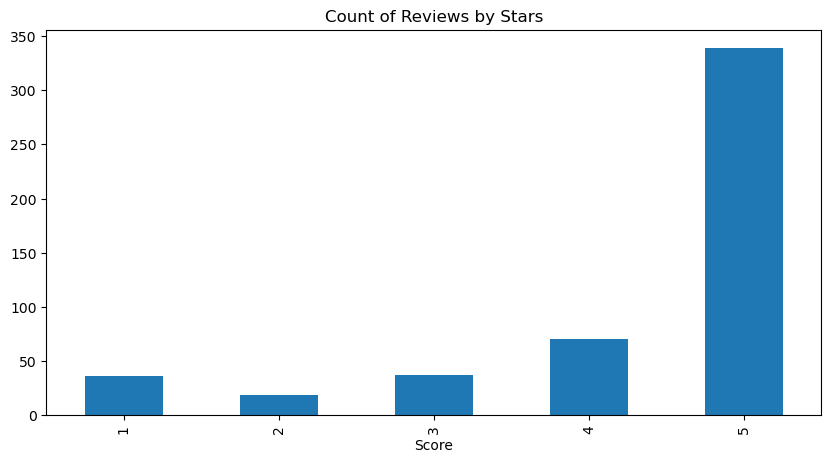

In [12]:
ax=data['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',figsize=(10,5))
ax.set_label('Review Stars')
plt.show()

As we may see the majority of the reviews are positive. Noticeably, the amount of 2 star reviews are the least

## Natural Language Toolkit (NLTK)

In [16]:
#take any random example
example = data['Text'][310]

In [18]:
#Tokenization
tokens = nltk.word_tokenize(example)
tokens[:20]

['I',
 'tried',
 'to',
 'find',
 'israeli',
 'couscous',
 'in',
 'a',
 'number',
 'of',
 'upsacale',
 'grocery',
 'stores',
 'and',
 'no',
 'luck',
 '.',
 'So',
 'I',
 'decided']

In [20]:
#Part-of-speech tagging
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('tried', 'VBD'),
 ('to', 'TO'),
 ('find', 'VB'),
 ('israeli', 'JJ'),
 ('couscous', 'JJ'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('number', 'NN'),
 ('of', 'IN')]

In [21]:
#Named entity recognition 
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  tried/VBD
  to/TO
  find/VB
  israeli/JJ
  couscous/JJ
  in/IN
  a/DT
  number/NN
  of/IN
  upsacale/JJ
  grocery/NN
  stores/NNS
  and/CC
  no/DT
  luck/NN
  ./.
  So/IN
  I/PRP
  decided/VBD
  to/TO
  try/VB
  good/JJ
  ole/JJ
  Amazon.com/NNP
  and/CC
  selected/VBN
  this/DT
  product/NN
  ./.
  It/PRP
  is/VBZ
  so/RB
  good/JJ
  ../NN
  add/VB
  a/DT
  few/JJ
  herbs/NN
  and/CC
  it/PRP
  's/VBZ
  a/DT
  great/JJ
  side/NN
  dish/NN
  ,/,
  or/CC
  add/VB
  more/JJR
  and/CC
  make/VB
  a/DT
  ``/``
  pasta/NN
  type/NN
  ''/''
  salad.so/JJ
  very/RB
  good/JJ
  ./.
  I/PRP
  am/VBP
  hooked/JJ
  ./.
  (GPE Great/NNP)
  flavor/NN
  and/CC
  so/RB
  easy/JJ
  to/TO
  prepare/VB
  !/.)


## 1. VADER sentiment analysis
VADER is a tool that assigns sentiment scores for each word. It will recognize how positive, negative or neuteral the word is

In [24]:
sia=SentimentIntensityAnalyzer()

In [25]:
sia.polarity_scores(example)

{'neg': 0.031, 'neu': 0.657, 'pos': 0.312, 'compound': 0.9644}

In [29]:
res={}
for i, row in tqdm(data.iterrows(),total=len(data)):
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [30]:
vaders=pd.DataFrame(res).T
print(vaders)

       neg    neu    pos  compound
1    0.000  0.695  0.305    0.9441
2    0.138  0.862  0.000   -0.5664
3    0.091  0.754  0.155    0.8265
4    0.000  1.000  0.000    0.0000
5    0.000  0.552  0.448    0.9468
..     ...    ...    ...       ...
496  0.000  0.554  0.446    0.9725
497  0.059  0.799  0.142    0.7833
498  0.025  0.762  0.212    0.9848
499  0.041  0.904  0.055    0.1280
500  0.000  0.678  0.322    0.9811

[500 rows x 4 columns]


Each review was assigned evaluated based on how positive, negative or neuteral it is.
The compound score is the weighted sum of sentiment scores

In [34]:
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(data, how='left')

## Plotting VADER results

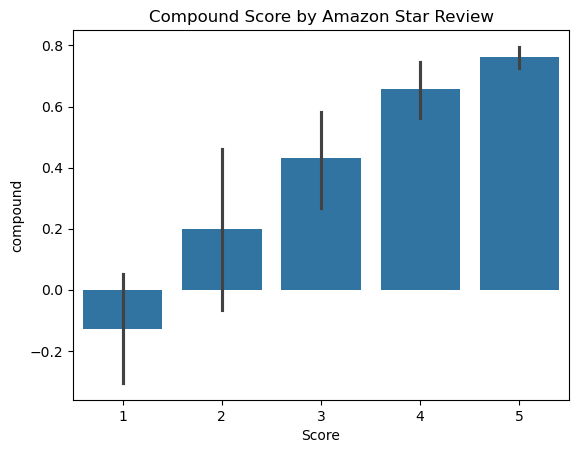

In [37]:
ax=sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

Expectedly, the compound score increases as the positivity increases

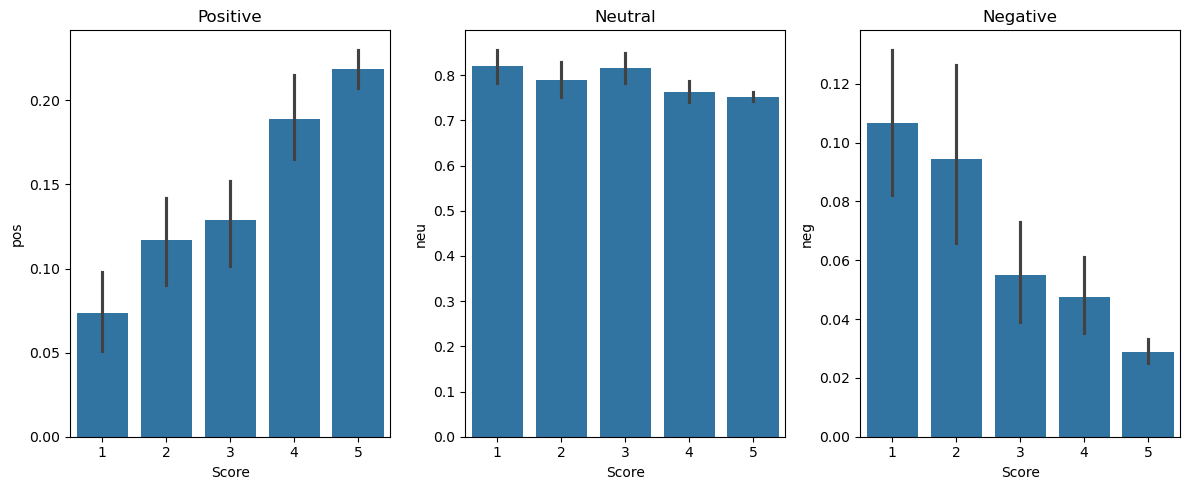

In [40]:
#plotting barplot for each sentiment
fid, axs = plt.subplots(1,3,figsize=(12,5))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

As we can see, higher score values have higher positivity and lower negativity scores. Whereas, lower score values have lower positivity and higher negativity scores. When it comes to neutral sentiment, the middle-range score value 3 has the highest neutral score and the highest score 5 has the lowest neutral score

## 2. RoBERTa pre-trained model
a transformer based Deep Learning model

In [44]:
from transformers import AutoTokenizer 
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [45]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [48]:
#VADER example
sia.polarity_scores(example)

{'neg': 0.031, 'neu': 0.657, 'pos': 0.312, 'compound': 0.9644}

In [50]:
#try the same example with roberta
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0023873975, 'roberta_neu': 0.009062732, 'roberta_pos': 0.9885499}


At this point, we may see the pre-trained RoBERTa model is more accurate in recongnizing positivity of this comment

In [53]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [55]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        pass

  0%|          | 0/500 [00:00<?, ?it/s]

In [59]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.678,
 'vader_pos': 0.322,
 'vader_compound': 0.9811,
 'roberta_neg': 0.0024397583,
 'roberta_neu': 0.01132722,
 'roberta_pos': 0.986233}

In [61]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(data, how='left')

## Score Comparison


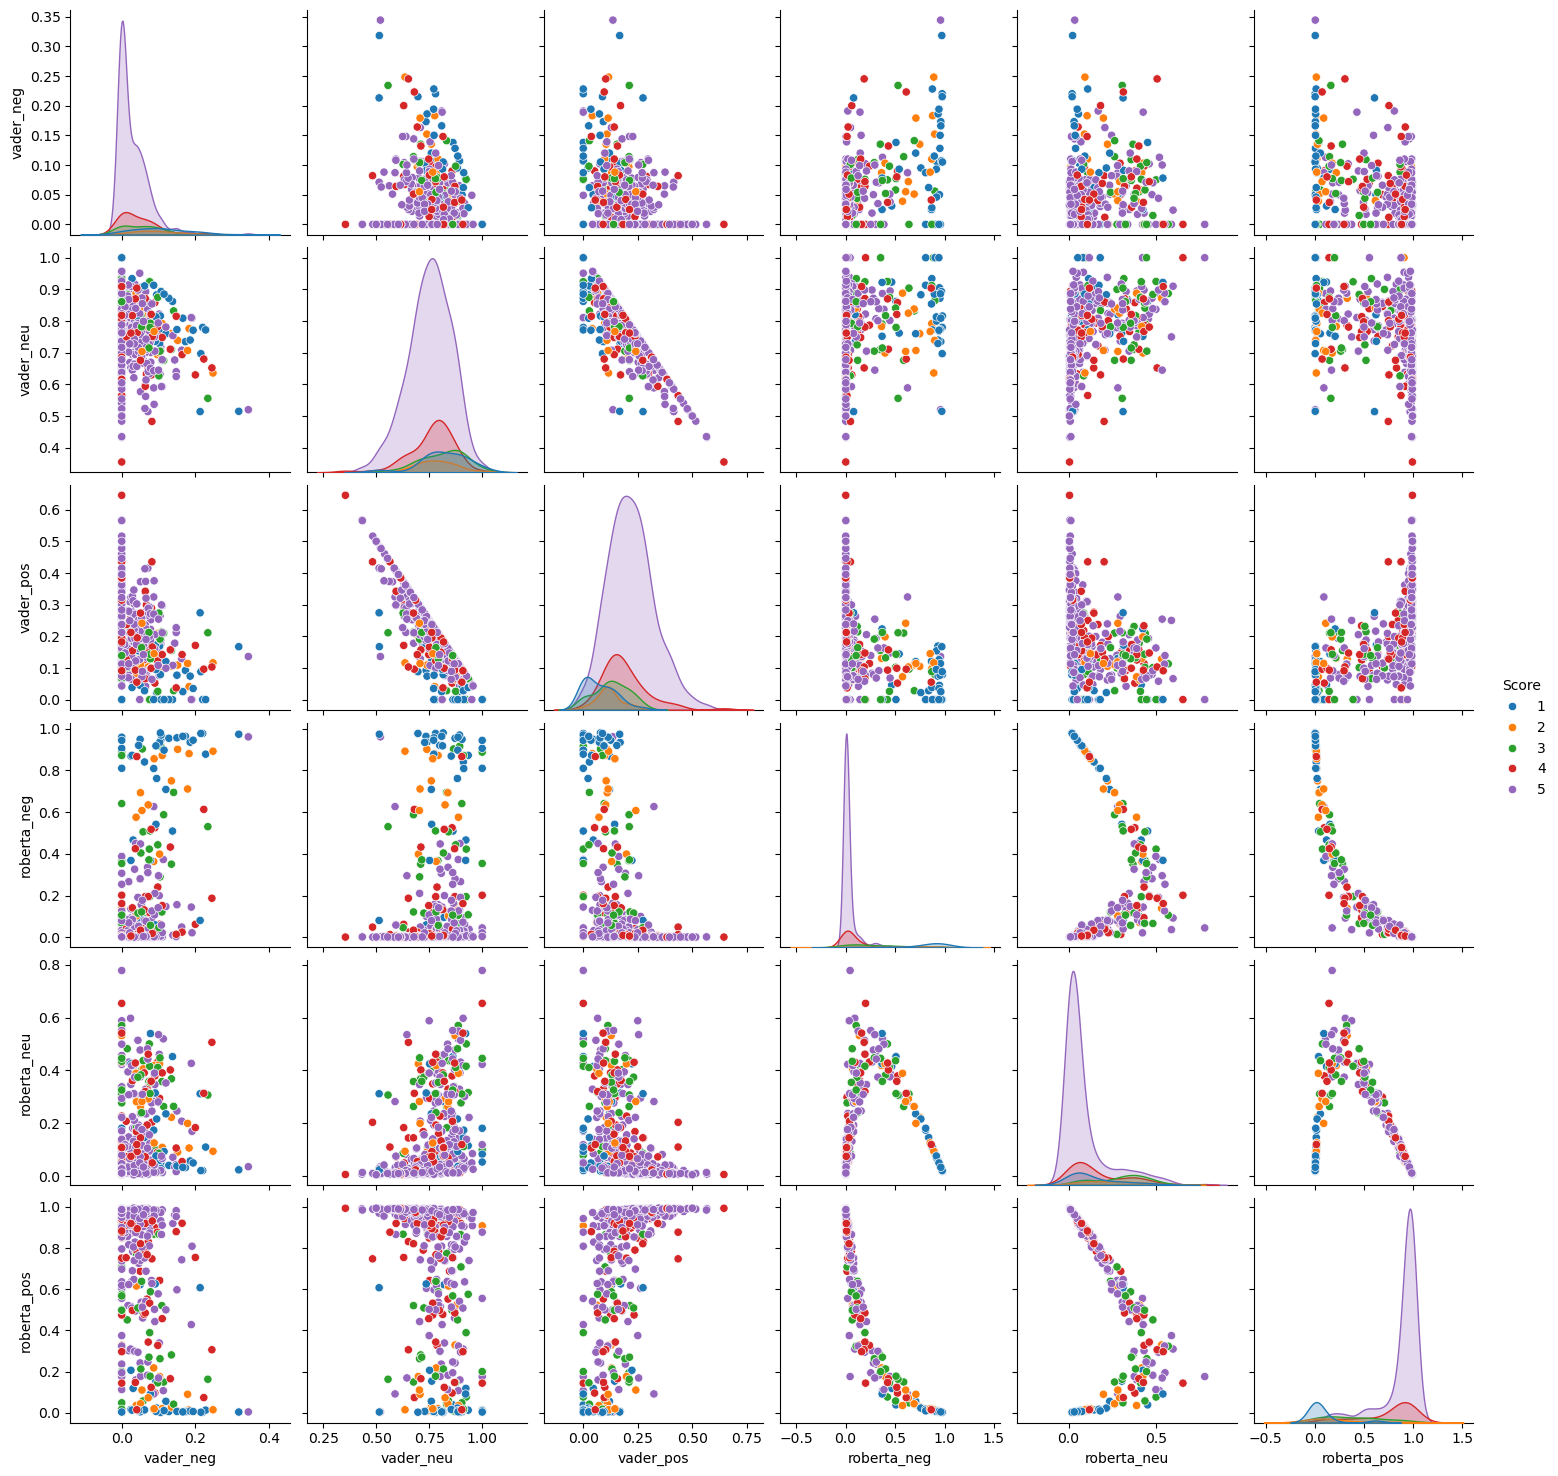

In [64]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

As we may see:
1) RoBERTa reconginizes positive sentiment more accurately and confidently compared to VADER tool. The positivity score of VADER for 5 star reviews is scattered along the whole range.
2) RoBERTa reconginzes negative sentiments more confidently, whereas VADER score for this reviews is more scattered
3) Neutral sentiment is identified more precisely by VADER

In [104]:
#negative sentiment
example_neg= data['Text'][data["Score"] < 3].dropna().astype(str).tolist()
arr_neg=[]
for ex in example_neg:
    arr_neg.append(sia.polarity_scores(ex))
vader_neg = []
for i in arr_neg:
    vader_neg.append(i["neg"])
vader_neg.sort()
vader_neg_m=np.median(vader_neg)

rob = []
for ex in example_neg:
    encode = tokenizer(ex, return_tensors='pt')
    output = model(**encode)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
    }
    rob.append(scores_dict)
rob_neg = []
for i in rob:
    rob_neg.append(i["roberta_neg"])
rob_neg.sort()
rob_neg_m=np.median(rob_neg)
print("Median negative value of VADER is ", vader_neg_m,"\nMedian negative value of RoBERTa is ", rob_neg_m, sep="")

Median negative value of VADER is 0.094
Median negative value of RoBERTa is 0.86155343


In [108]:
#neutral sentiment
example_neu= data['Text'][data["Score"] == 3].dropna().astype(str).tolist()
arr_neu=[]
for ex in example_neu:
    arr_neu.append(sia.polarity_scores(ex))
vader_neu = []
for i in arr_neu:
    vader_neu.append(i["neu"])
vader_neu.sort()
vader_neu_m=np.median(vader_neu)
rob = []
for ex in example_neu:
    encode = tokenizer(ex, return_tensors='pt')
    output = model(**encode)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
    }
    rob.append(scores_dict)
rob_neu = []
for i in rob:
    rob_neu.append(i["roberta_neu"])
rob_neu.sort()
rob_neu_m=np.median(rob_neu)
print("Median neutral value of VADER is ", vader_neu_m,"\nMedian neutral value of Roberta is ", rob_neu_m, sep="")

Median neutral value of VADER is 0.833
Median neutral value of Roberta is 0.32596105


The RoBERTa model turned out to be by 86% more accurate in recognizing negative sentiment. Whereas Vader is by 51% more accurate in identifying neutral sentiment

## Examples 

In [101]:
results_df.query('Score==1').sort_values('roberta_pos',ascending =False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [103]:
results_df.query('Score==1').sort_values('vader_pos',ascending =False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [107]:
results_df.query('Score==5').sort_values('roberta_neg',ascending =False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'